## Iris Data Set Exploration. The Hello World of ML.

Note : My subplots are creating an extra plot even though I have specified a 1 X 2 grid. Can anyone please take a look and point out what am I doing wrong there?

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

from IPython.display import display

%matplotlib inline

In [34]:
from sklearn import datasets
iris = datasets.load_iris()


iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= ["sepalLength", "sepalWidth", "petalLength", "petalWidth", "target"])

# Target Descriptor

# 0 -> Sentosa
# 1 -> versicolor
# 2 -> virginica

def getTargetName(row):
    target = row["target"]
    if int(target) == 0:
        return "Sentosa"
    elif int(target) == 1:
        return "Versicolor"
    else:
        return "virginica"
    
iris["target_name"] = iris.apply(getTargetName, axis = 1)

display(iris.sample(n = 5))

,sepalLength,sepalWidth,petalLength,petalWidth,target,target_name
141,6.9,3.1,5.1,2.3,2.0,virginica
106,4.9,2.5,4.5,1.7,2.0,virginica
72,6.3,2.5,4.9,1.5,1.0,Versicolor
17,5.1,3.5,1.4,0.3,0.0,Sentosa
93,5.0,2.3,3.3,1.0,1.0,Versicolor


## Exploratory Data Analysis

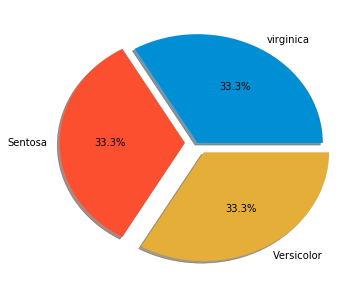

In [35]:
iris["target_name"].value_counts().plot(kind = 'pie', figsize = (5, 5), explode = [0, 0.1, 0.1], autopct = '%1.1f%%', shadow = True)
plt.ylabel("")
plt.show()

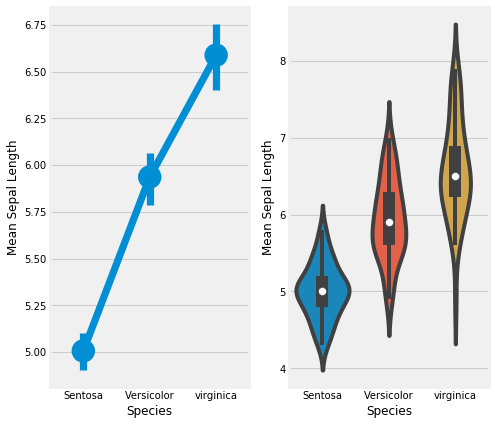

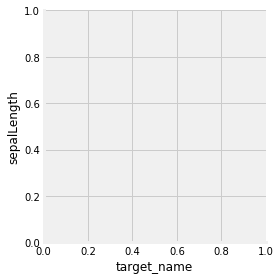

In [36]:
# Individual Feature Analysis.
f, ax = plt.subplots(1, 2 , figsize=(7, 7))

sns.factorplot(x = "target_name", y = "sepalLength", data = iris, ax = ax[0])
ax[0].set_xlabel("Species")
ax[0].set_ylabel("Mean Sepal Length")

sns.violinplot(x = "target_name", y = "sepalLength", data = iris, ax = ax[1])
ax[1].set_xlabel("Species")
ax[1].set_ylabel("Mean Sepal Length")

plt.show()

Looks like Sentosa has the least mean sepalLength, followed by versicolor and then virginica.
Since there is a good seperation, sepal Length can turn out to be a good feature to use to classify these species. An interesting thing to note here is that sentosa can be clearly seperated from the other two species based on this feature(If you look closely at the IQR of the different species). The other two species can kind of have overlapping sepal lengths.

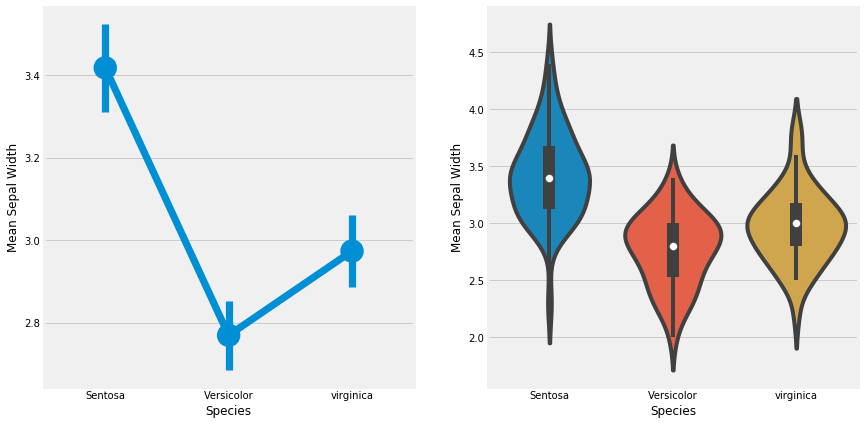

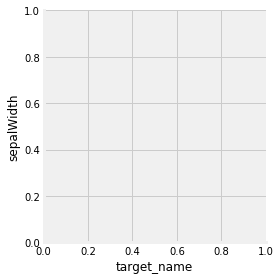

In [37]:
f, ax = plt.subplots(1, 2 , figsize=(13,7 ))

sns.factorplot(x = "target_name", y = "sepalWidth", data = iris, ax = ax[0])
ax[0].set_xlabel("Species")
ax[0].set_ylabel("Mean Sepal Width")

sns.violinplot(x = "target_name", y = "sepalWidth", data = iris, ax = ax[1])
ax[1].set_xlabel("Species")
ax[1].set_ylabel("Mean Sepal Width")

plt.show()

Sentosa has the maximum mean sepal width followed by virginica. Versicolor has the least mean sepal width.
Looking at the above two graphs, i suspect if we draw a scatter plot b/w Sepal width and Sepal Length, sentosa can be clearly seperated from the other two.

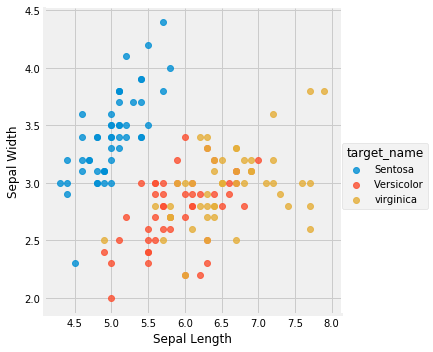

In [38]:
sns.lmplot(x = "sepalLength", y = "sepalWidth", hue = "target_name", data = iris, fit_reg = False)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

And clearly so. Both of these features seem important to classify b/w sentosa and non sentosa species.

Lets now turn our analysis to Petal Length and Width. We have so far been able to seperate sentosa from the other two using the sepal features. Lets see if we can clearly seperate virginica and versicolor from each other using the petal features.

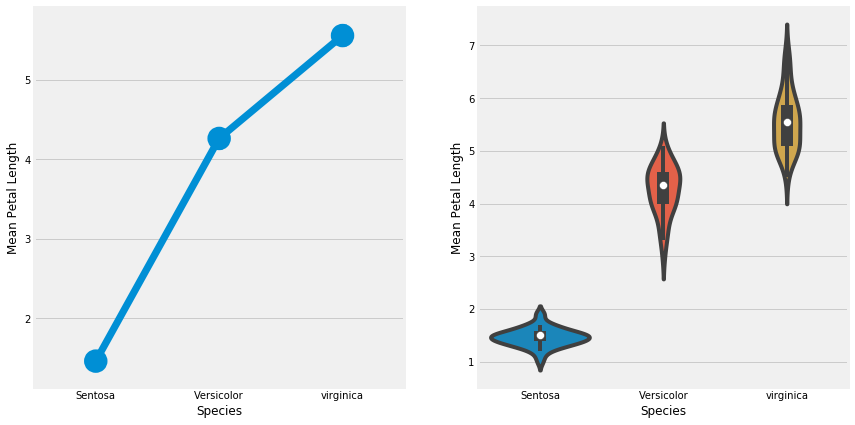

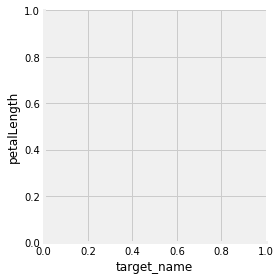

In [39]:
f,ax=plt.subplots(1,2,figsize=(13, 7))

sns.factorplot(x = "target_name", y = "petalLength", data = iris, ax = ax[0])
ax[0].set_xlabel("Species")
ax[0].set_ylabel("Mean Petal Length")

sns.violinplot(x = "target_name", y = "petalLength", data = iris, ax = ax[1])
ax[1].set_xlabel("Species")
ax[1].set_ylabel("Mean Petal Length")

plt.show()

Petal Length seems to well seperate all the three species

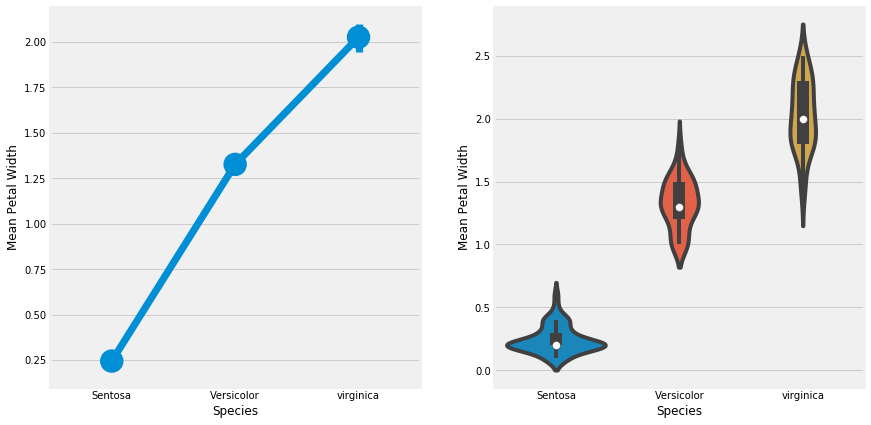

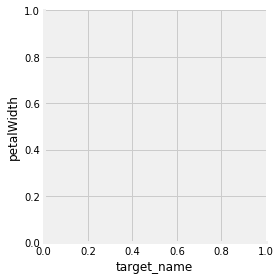

In [40]:
f,ax=plt.subplots(1,2,figsize=(13, 7))

sns.factorplot(x = "target_name", y = "petalWidth", data = iris, ax = ax[0])
ax[0].set_xlabel("Species")
ax[0].set_ylabel("Mean Petal Width")

sns.violinplot(x = "target_name", y = "petalWidth", data = iris, ax = ax[1])
ax[1].set_xlabel("Species")
ax[1].set_ylabel("Mean Petal Width")

plt.show()

Petal width also does a good job seperating all the three species. Do we really need the sepal features?

/Users/ishans/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


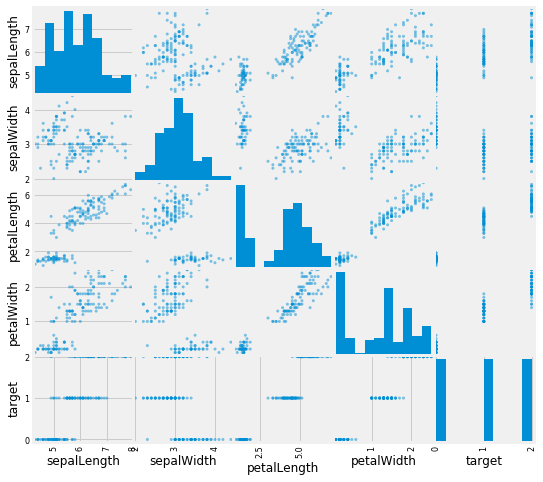

In [41]:
pd.scatter_matrix(iris, figsize = (8, 8))
plt.show()

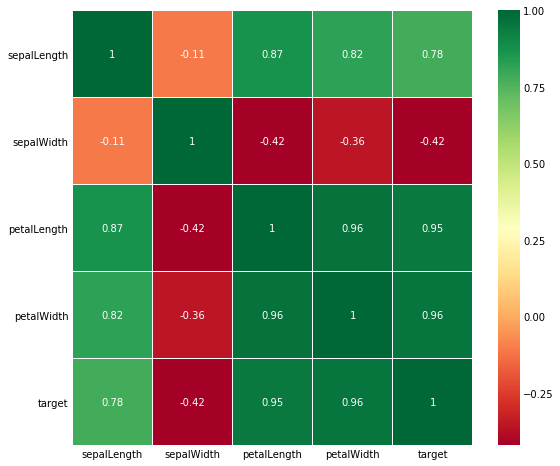

In [42]:
corr = iris.corr()
sns.heatmap(corr, annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

Petal Length seems to be highly correlated with petal width. So we should be able to remove one of them and with minimal inforamtion loss

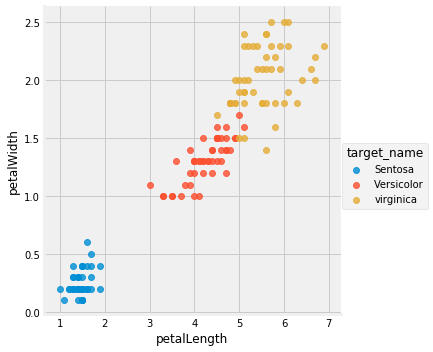

In [43]:
sns.lmplot(x = "petalLength", y = "petalWidth", hue = "target_name", data = iris, fit_reg = False)
plt.show()

Petal length and Petal width do a much better job at seperating all the three species than Sepal length and sepal width. What we did above in a step wise manner can be directly done using pair plots as below.

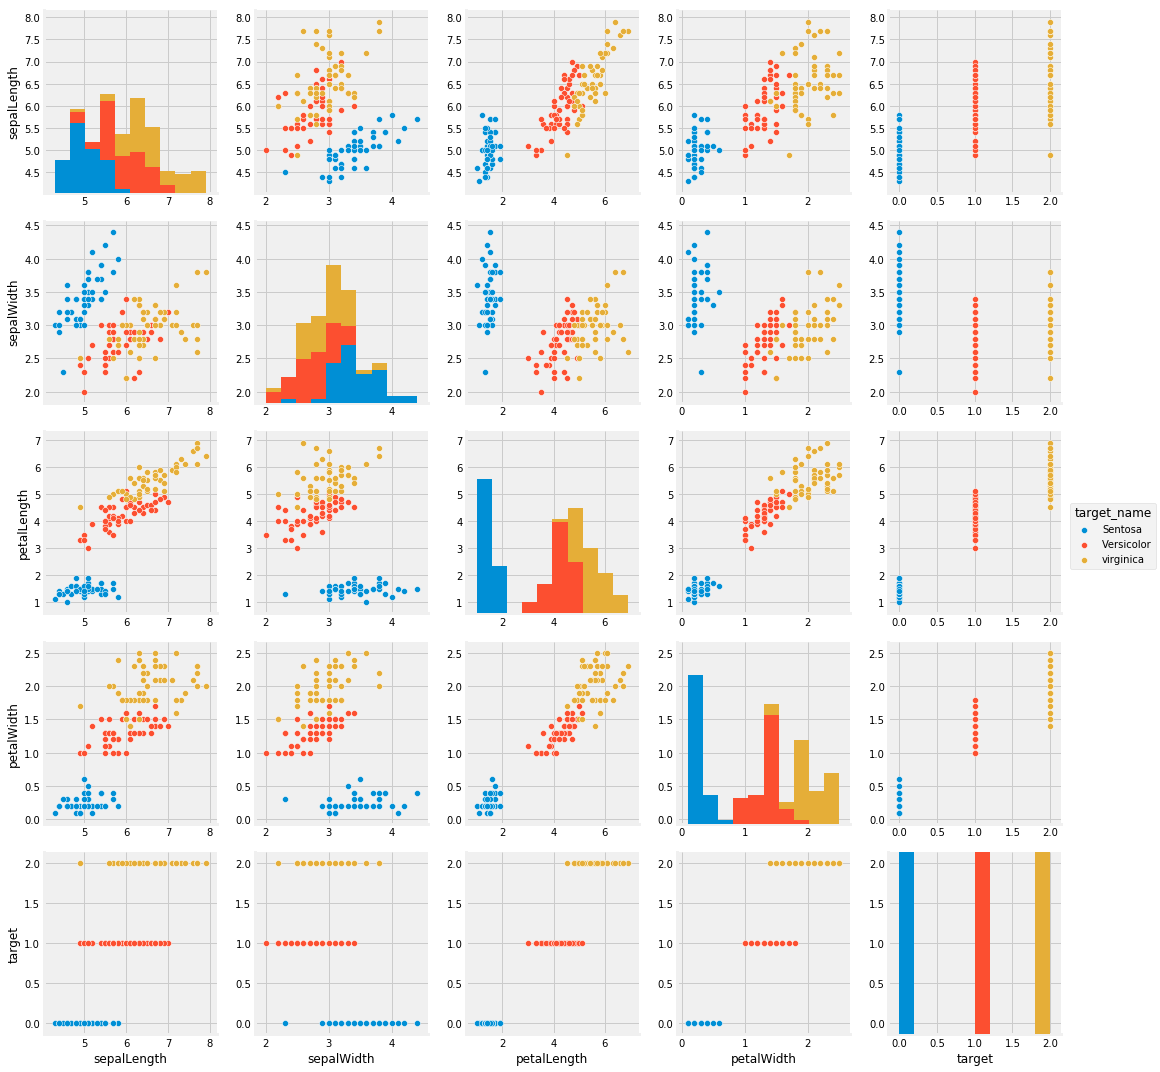

In [44]:
sns.pairplot(iris, hue = "target_name", size = 3)
plt.show()

As you can see from the above pair plots, petal length and petal width do a very good job at seperating the species.

## Predective Modelling

In [45]:
# Lets build a decision tree and find out the features it considers as important

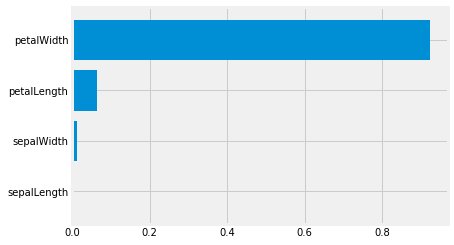

In [46]:
features = iris.drop(labels = ["target", "target_name"], axis = 1)
target = iris["target"]

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)

classifier.fit(features, target)

pd.Series(classifier.feature_importances_, features.columns).sort_values(ascending = True).plot.barh(width=0.8)
plt.show()

Decision tree considers Petal Width as the most important feature. The sepal features are mostly neglected.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [54]:
results = pd.DataFrame(columns = ['Model_Name', 'Model', 'Params', 'Test_Score', 'CV_Mean', 'CV_Std'])
def save(grid, modelName):
    global results
    cv_scores = cross_val_score(grid.best_estimator_, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    test_score = grid.score(X_test, y_test)
    
    print("Best model parameter are\n", grid.best_estimator_)
    print("Saving model {}\n".format(modelName))
    print("Mean Cross validation score is {} with a Standard deviation of {}\n".format(cv_mean, cv_std))
    print("Test Score for the model is {}\n".format(test_score))
    
    cm = confusion_matrix(y_test, grid.best_estimator_.predict(X_test))
    
    cm_df = pd.DataFrame(cm, index = ["Sentosa", "versicolor", "Virginica"], columns = ["Sentosa", "versicolor", "Virginica"])
    sns.heatmap(cm_df, annot = True)
    plt.show()
    
    results = results.append({'Model_Name' : modelName, 'Model' : grid.best_estimator_, 'Params' : grid.best_params_, 'Test_Score' : test_score, 'CV_Mean' : cv_mean, 'CV_Std' : cv_std}
                                       , ignore_index=True)

In [55]:
def doGridSearch(classifier, params):
    score_fn = make_scorer(accuracy_score)
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    grid = GridSearchCV(classifier, params, scoring = score_fn, cv = cv)
    grid = grid.fit(X_train, y_train)
    return grid    

##### Training Different Models

##### SVC

Best model parameter are
 SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Saving model SVC

Mean Cross validation score is 0.9591991341991342 with a Standard deviation of 0.06615387550885994

Test Score for the model is 1.0



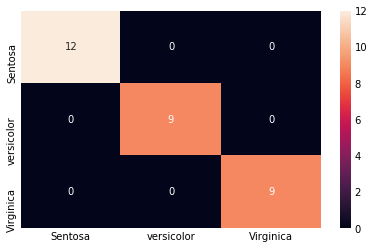

In [56]:
from sklearn.svm import SVC
svc = SVC(random_state = 0)
params = {"C" : [0.1, 1, 1.1, 1.2], "gamma" : [0.01, 0.02, 0.03, 0.04, 0.08, 0.1, 1], 
          "kernel" : ["linear", "poly", "rbf", "sigmoid"]}

grid = doGridSearch(svc, params)
save(grid, 'SVC')

##### Logistic Regression

Best model parameter are
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Saving model LogisticRegression

Mean Cross validation score is 0.949242424242424 with a Standard deviation of 0.0557783640430302

Test Score for the model is 1.0



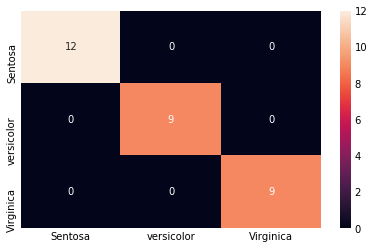

In [57]:
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression(random_state = 0)
params = {}

grid = doGridSearch(logisticModel, params)
save(grid, 'LogisticRegression')

##### Naive Bayes

Best model parameter are
 GaussianNB(priors=None)
Saving model NaiveBayes

Mean Cross validation score is 0.9496753246753246 with a Standard deviation of 0.05802369854119041

Test Score for the model is 0.9666666666666667



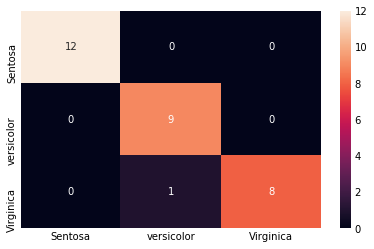

In [58]:
from sklearn.naive_bayes import GaussianNB

naiveModel = GaussianNB()
params = {}

grid = doGridSearch(naiveModel, params)
save(grid, 'NaiveBayes')

In [59]:
display(results.sort_values(by = 'Test_Score', ascending = False))

,Model_Name,Model,Params,Test_Score,CV_Mean,CV_Std
0,SVC,"SVC(C=1.2, cache_size=200, class_weight=None, ...","{'C': 1.2, 'gamma': 0.03, 'kernel': 'poly'}",1.000000,0.959199,0.066154
1,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",{},1.000000,0.949242,0.055778
2,NaiveBayes,GaussianNB(priors=None),{},0.966667,0.949675,0.058024


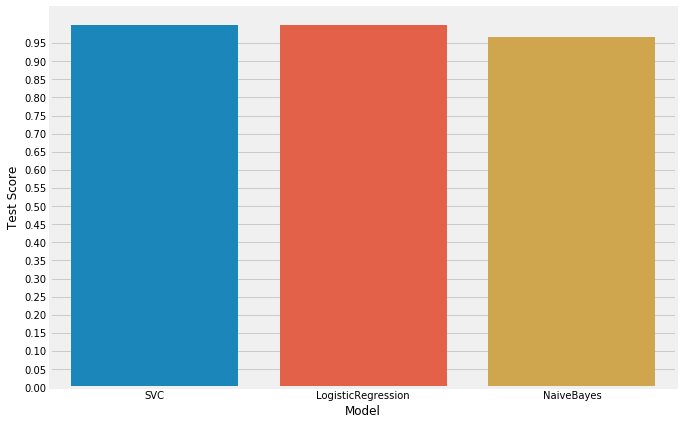

In [64]:
sns.barplot(x = "Model_Name", y = "Test_Score", data = results)
plt.xlabel("Model")
plt.ylabel("Test Score")
plt.yticks(np.arange(0, 1, 0.05))
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()